In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [2]:
df = pd.read_csv(r"C:\Users\imane\OneDrive\Desktop\home_exchange\HomeExchange\data\HomeExchange_ML.csv")
df.head()

user_id  nb_year  has_renewed  is_new_user  referral  promotion  payment3x  \
0        1        1            0            0         0          0          0   
1        9        2            1            0         0          0          0   
2       10        1            1            1         0          0          0   
3       40        1            1            0         0          0          0   
4       67        1            1            1         0          0          0   

   payement2  payment3  abscence_days  ...  exchanges_host  nb_guests_host  \
0          0         0           3250  ...            32.0             4.0   
1          0         0            365  ...           380.0             4.0   
2          0         0              0  ...            53.0             3.0   
3          0         0           1096  ...             4.0             3.0   
4          0         0              0  ...            53.0             3.0   

   nights_host  capacity_host  diff_capacity_host  finalized_host  \
0          6.0            8.0                 4.0             2.0   
1          5.0            7.0                 3.0             8.0   
2         11.0           12.0                 9.0             0.0   
3          5.0            5.0                 2.0             0.0   
4          8.0            6.0                 3.0             1.0   

   book_diff_host exchange_type_host_clean home_host_clean  \
0            56.0           NON_RECIPROCAL            Home   
1            43.0           NON_RECIPROCAL       apartment   
2           121.0           NON_RECIPROCAL       apartment   
3           104.0           NON_RECIPROCAL            Home   
4           144.0           NON_RECIPROCAL       apartment   

  residence_host_clean  
0              primary  
1              primary  
2              primary  
3              primary  
4              primary  

[5 rows x 30 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70726 entries, 0 to 70725
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    70726 non-null  int64  
 1   nb_year                    70726 non-null  int64  
 2   has_renewed                70726 non-null  int64  
 3   is_new_user                70726 non-null  int64  
 4   referral                   70726 non-null  int64  
 5   promotion                  70726 non-null  int64  
 6   payment3x                  70726 non-null  int64  
 7   payement2                  70726 non-null  int64  
 8   payment3                   70726 non-null  int64  
 9   abscence_days              70726 non-null  int64  
 10  exchanges_guest            70726 non-null  float64
 11  nb_guests_guest            70726 non-null  float64
 12  nights_guest               70726 non-null  float64
 13  capacity_guest             70726 non-null  flo

In [4]:
df = df.set_index("user_id")

In [5]:
df[["nb_year","is_new_user","abscence_days","exchanges_guest","exchanges_host","has_renewed"]].corr()

nb_year  is_new_user  abscence_days  exchanges_guest  \
nb_year          1.000000    -0.257376       0.087006         0.126829   
is_new_user     -0.257376     1.000000      -0.532440        -0.028843   
abscence_days    0.087006    -0.532440       1.000000        -0.035292   
exchanges_guest  0.126829    -0.028843      -0.035292         1.000000   
exchanges_host   0.169811    -0.114187       0.105317         0.428096   
has_renewed      0.239876    -0.152245       0.109539         0.128619   

                 exchanges_host  has_renewed  
nb_year                0.169811     0.239876  
is_new_user           -0.114187    -0.152245  
abscence_days          0.105317     0.109539  
exchanges_guest        0.428096     0.128619  
exchanges_host         1.000000     0.171869  
has_renewed            0.171869     1.000000

In [6]:
df["exchange_type_guest_clean"] = df["exchange_type_guest_clean"].astype("string")
df["home_guest_clean"] = df["home_guest_clean"].astype("string")
df["residence_guest_clean"] = df["residence_guest_clean"].astype("string")
df["exchange_type_host_clean"] = df["exchange_type_host_clean"].astype("string")
df["home_host_clean"] = df["home_host_clean"].astype("string")
df["residence_host_clean"] = df["residence_host_clean"].astype("string")

In [7]:
scaler = StandardScaler()
df_num = scaler.fit_transform(df.select_dtypes(include="number"))

In [8]:
df_num = pd.DataFrame(df_num, columns=df.select_dtypes(include="number").columns)

In [9]:
idx = df.index

In [10]:
df_num = df_num.set_index(idx)

In [11]:
df_cat = pd.get_dummies(df.select_dtypes(exclude="number"))

In [12]:
df_ml = df_num.join(df_cat)

In [13]:
ml = df_ml[["is_new_user","referral","payment3x","payement2","payment3","exchange_type_guest_clean_NON_RECIPROCAL",
           "residence_host_clean_primary","home_guest_clean_Home","home_host_clean_Home","residence_guest_clean_primary",
           "exchange_type_host_clean_NON_RECIPROCAL","capacity_host","diff_capacity_host","exchange_type_guest_clean_NON_RECIPROCAL",
           "nb_guests_guest","diff_capacity_guest","book_diff_guest","home_guest_clean_NOT GUEST","exchange_type_guest_clean_NOT GUEST",
           "residence_guest_clean_NOT GUEST","abscence_days","book_diff_host","nb_year"]]

In [14]:
inertias = []
nb_k = range(1,10)
for k in nb_k:
    km = KMeans(n_clusters=k, n_init=100)
    km.fit(ml)
    inertias.append(km.inertia_)

In [15]:
line = px.line(inertias)
line.show()

In [16]:
km = KMeans(n_clusters=3, n_init=100)
km.fit(ml)
km_labels = km.predict(ml)

In [17]:
km_labels = pd.DataFrame(km_labels)

<Axes: xlabel='0', ylabel='count'>

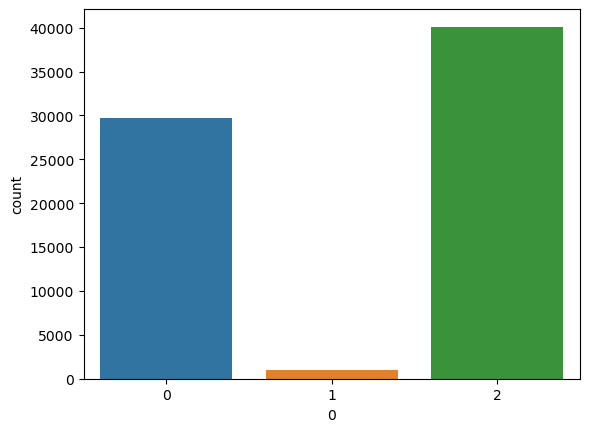

In [18]:
sns.countplot(km_labels, x=km_labels[0])

In [19]:
centroids = km.cluster_centers_

In [20]:
df_centroids = pd.DataFrame(centroids, columns = ml.columns)

In [21]:
labels = km.predict(ml)

In [22]:
def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)        


def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20) 

In [23]:
palette = sns.color_palette("bright", 10)

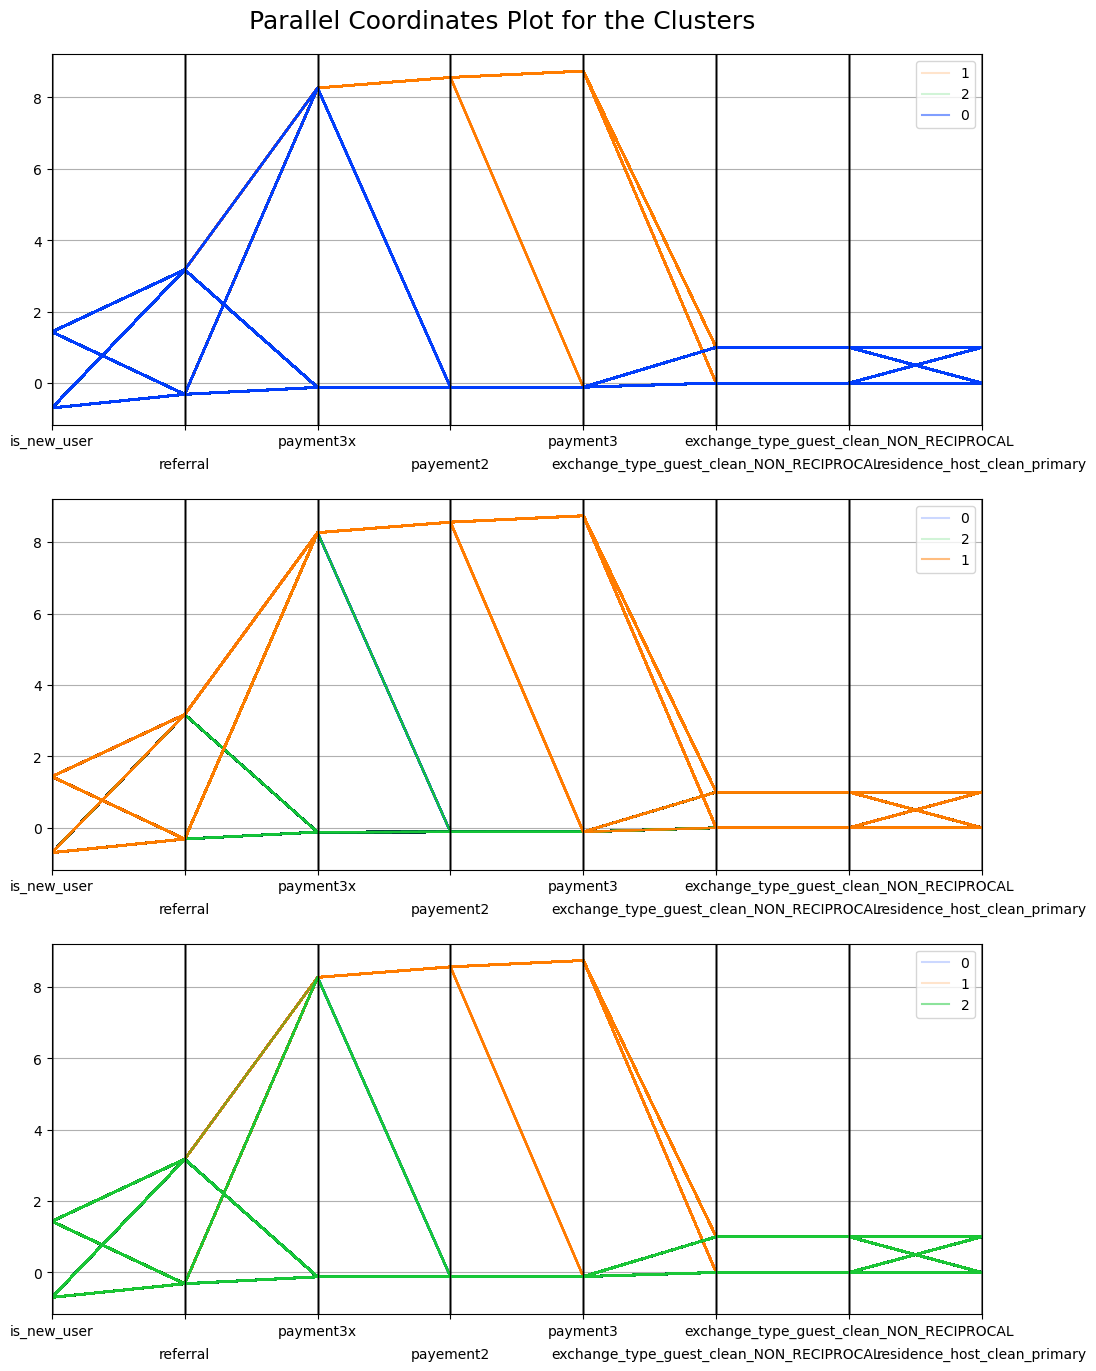

In [24]:
X_clustered_1 = pd.DataFrame(ml[["is_new_user","referral","payment3x","payement2","payment3","exchange_type_guest_clean_NON_RECIPROCAL",
           "residence_host_clean_primary"]], index=ml.index, columns=ml[["is_new_user","referral","payment3x","payement2","payment3","exchange_type_guest_clean_NON_RECIPROCAL",
           "residence_host_clean_primary"]].columns)
X_clustered_1["cluster"] = labels
display_parallel_coordinates(X_clustered_1, 3)

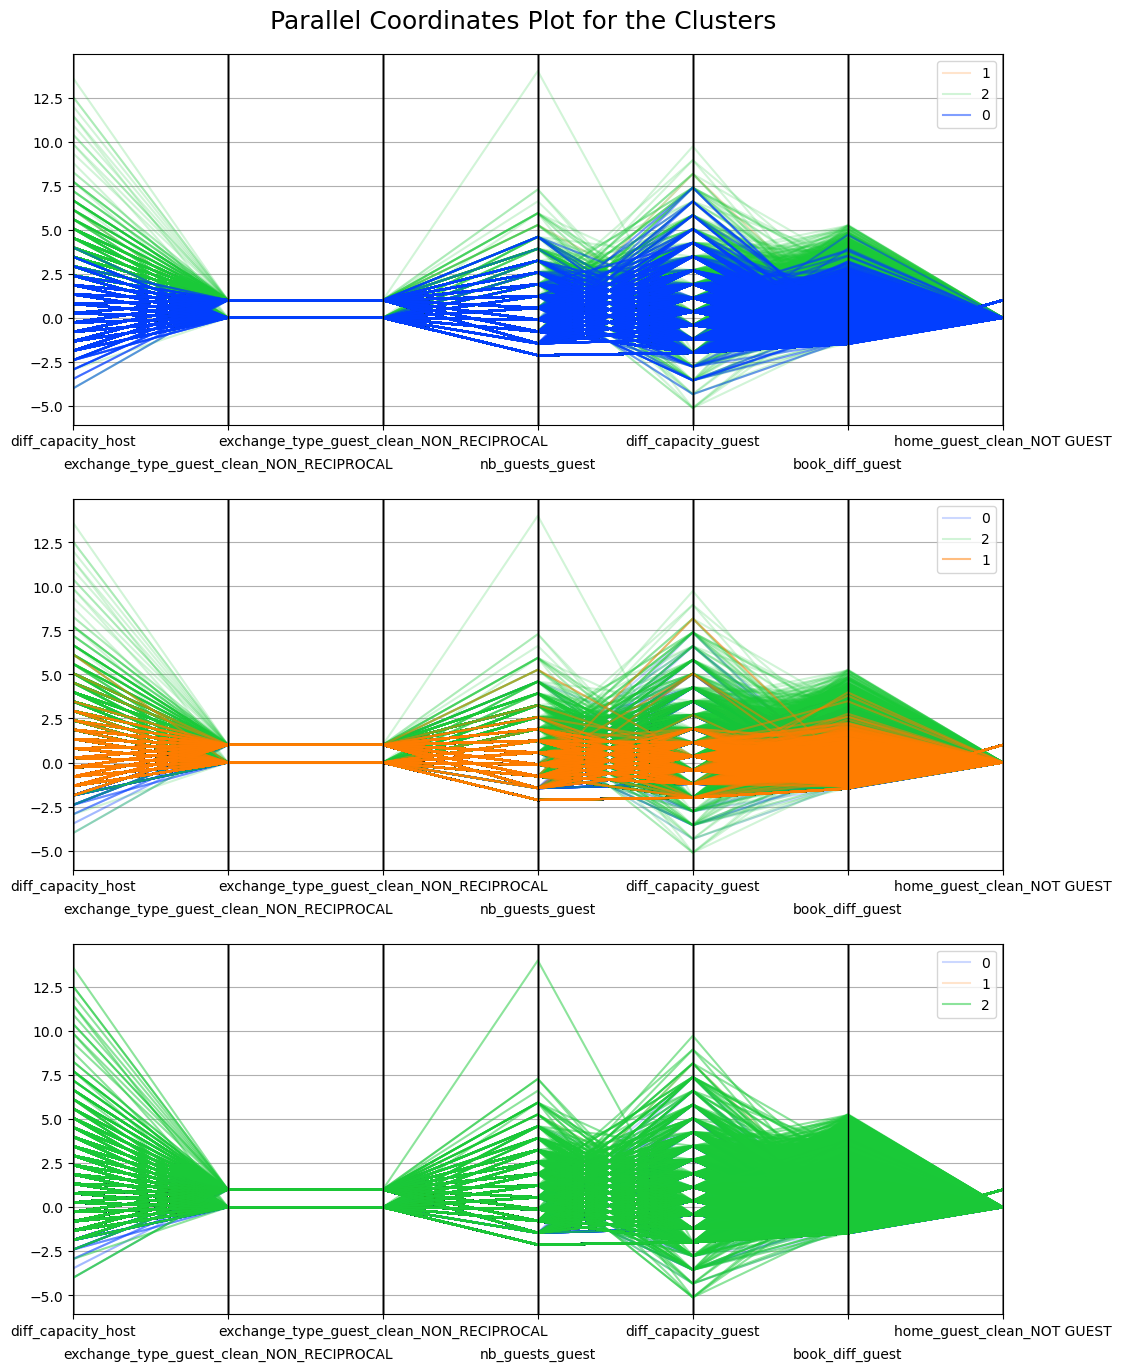

In [25]:
X_clustered_2 = pd.DataFrame(ml[["diff_capacity_host","exchange_type_guest_clean_NON_RECIPROCAL",
           "nb_guests_guest","diff_capacity_guest","book_diff_guest","home_guest_clean_NOT GUEST"]], index=ml.index, columns=ml[["diff_capacity_host","exchange_type_guest_clean_NON_RECIPROCAL",
           "nb_guests_guest","diff_capacity_guest","book_diff_guest","home_guest_clean_NOT GUEST"]].columns)
X_clustered_2["cluster"] = labels
display_parallel_coordinates(X_clustered_2, 3)

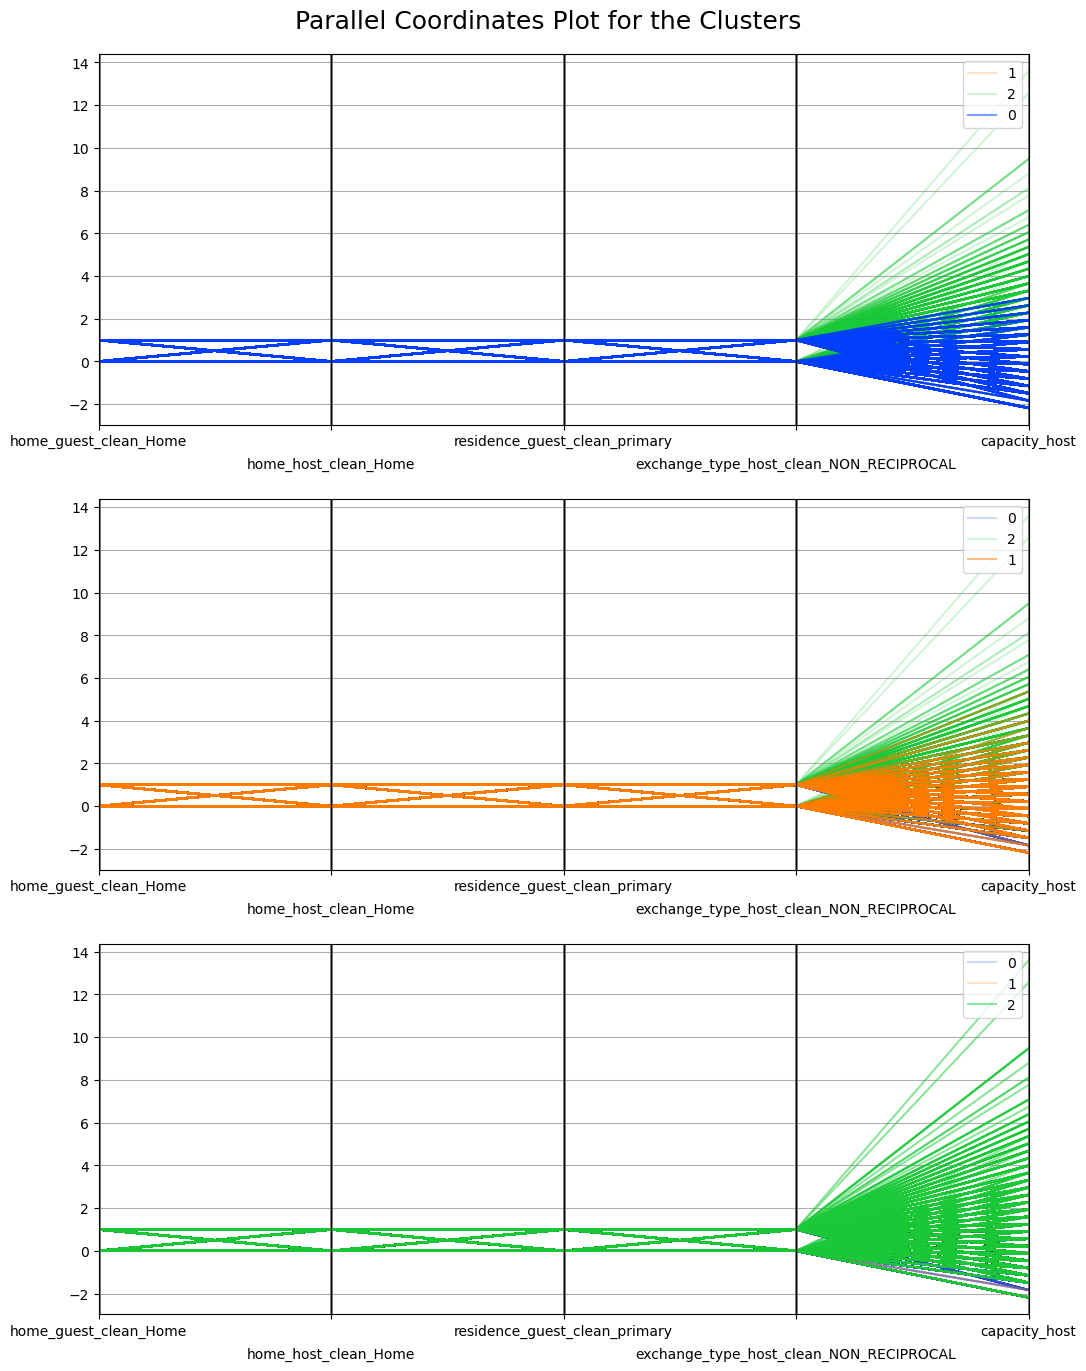

In [26]:
X_clustered_3 = pd.DataFrame(ml[["home_guest_clean_Home","home_host_clean_Home","residence_guest_clean_primary",
           "exchange_type_host_clean_NON_RECIPROCAL","capacity_host"]], index=ml.index, columns=ml[["home_guest_clean_Home","home_host_clean_Home","residence_guest_clean_primary",
           "exchange_type_host_clean_NON_RECIPROCAL","capacity_host"]].columns)
X_clustered_3["cluster"] = labels
display_parallel_coordinates(X_clustered_3, 3)   

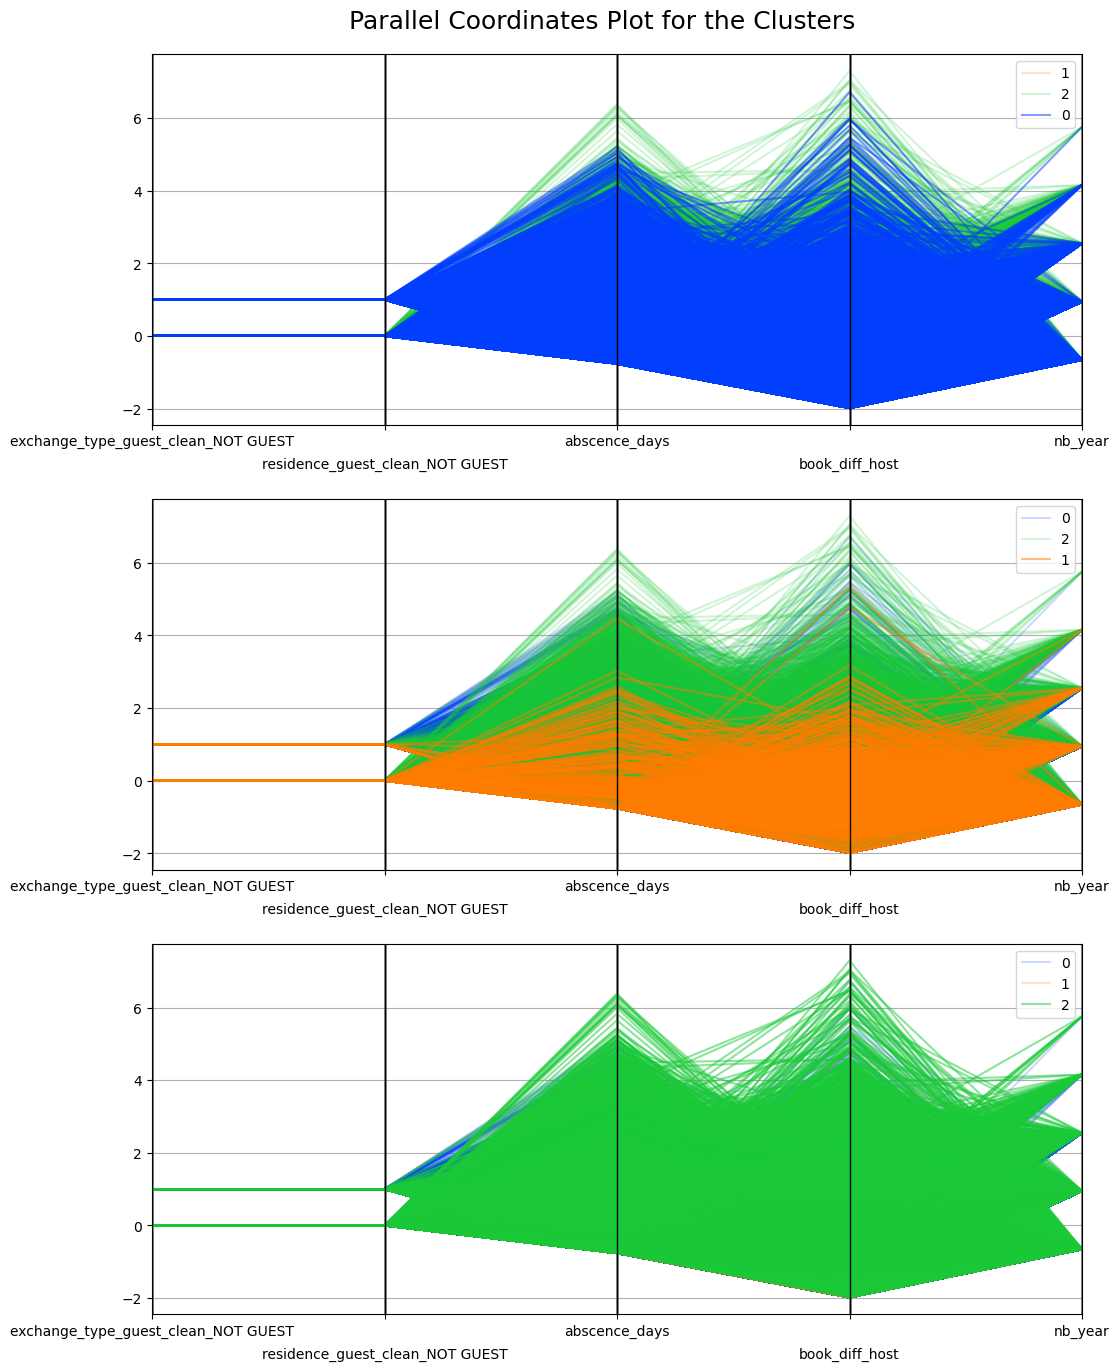

In [27]:
X_clustered_4 = pd.DataFrame(ml[["exchange_type_guest_clean_NOT GUEST",
           "residence_guest_clean_NOT GUEST","abscence_days","book_diff_host","nb_year"]], index=ml.index, columns=ml[["exchange_type_guest_clean_NOT GUEST",
           "residence_guest_clean_NOT GUEST","abscence_days","book_diff_host","nb_year"]].columns)
X_clustered_4["cluster"] = labels
display_parallel_coordinates(X_clustered_4, 3)   